In [1]:
from src.funcs import *

In [2]:
# 初始化对象
vbh = VaidyaBlackHole()

In [3]:
# 吸积率 0 ~ 0.0625
mu = 5e-3
# 更新mu
vbh.update_mu(mu)

# 观测者倾角 [D]
theta0 = 17
# 更新theta0
vbh.update_theta0(theta0)

# 更新文件路径 - mu或theta0发生变化时必须运行本函数
vbh.update_filepath()

In [5]:
# 网格数量
hnum = 1000
# 打印日志
print("计算中: mu = %.2e theta0 = %02d" % (mu, theta0))
# 保存brcd
vbh.save_brcd_h5(hnum)

计算中: mu = 5.00e-03 theta0 = 17
正在计算1000*1000=1.00e+06个网格点.


/Users/washy/Library/CloudStorage/OneDrive-个人/01_研究工作/03_理论物理_Vaidya黑洞阴影/02_相关代码/github/IVBH/src/funcs.py:237: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(self.func_G_uc(uc,b))


Save: ./Results/brcd/c_brcd_mu_5.00e-03_theta0_17.h5


In [ ]:
with h5py.File(vbh.brcdfilepath,'r') as f:
    # ISCO
    Risco = f["Risco"][()]
    # 图像尺寸
    hlim = f["hlim"][()]
    # 二维网格 - X轴
    px = f["px"][:]
    # 二维网格 - Y轴
    py = f["py"][:]
    # 直接图像 - 光源半径
    rcd_0 = f["rcd_0"][:]
    # 次级图像 - 光源半径
    rcd_1 = f["rcd_1"][:]

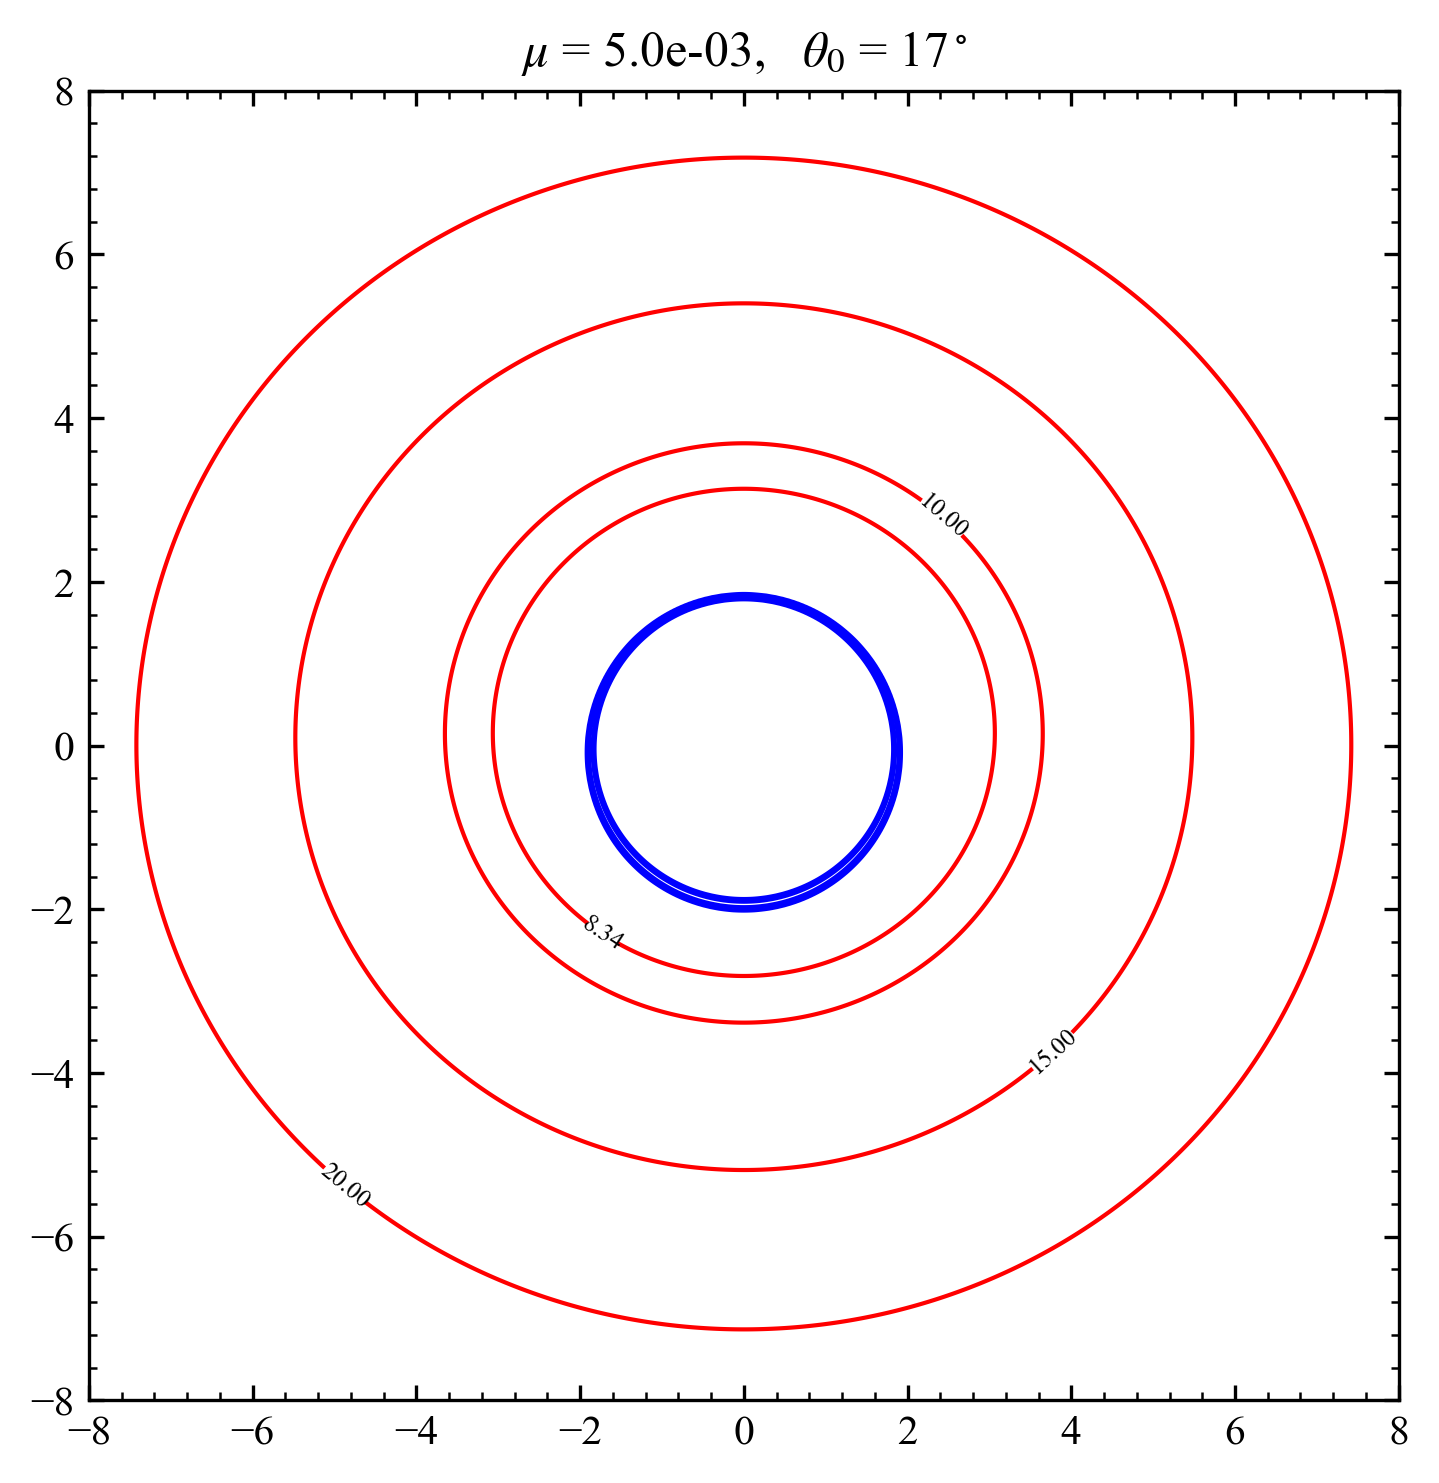

In [ ]:
plt.figure(figsize=(4.8,4.8),dpi=300)

# 需要显示的等高线
levels_rc = [Risco, 10.0, 15.0, 20.0]

# 主要图像
cs = plt.contour(px, py, rcd_0, levels_rc, colors='r', linewidths=1)
# 次级图像
plt.contour(px, py, rcd_1, levels_rc, colors='b', linewidths=1)

# 添加标签
plt.clabel(cs, inline=True, inline_spacing=-10, fmt='%.2f', colors='k', fontsize=6)

plt.gca().set_aspect('equal', adjustable='box')

# 显示四周坐标刻度
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
# 设置副坐标刻度间隔
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.4))
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.4))
# xy主坐标刻度朝内
plt.gca().tick_params(axis="both", which="major", direction="in")
# xy副坐标刻度朝内
plt.gca().tick_params(axis="both", which="minor", direction="in")

# 设置显示的坐标刻度
hlim=8
plt.xlim(-hlim,hlim)
plt.ylim(-hlim,hlim)

plt.title(r"$\mu$ = " + "%.1e"%mu + r",$\quad \theta_0$ = " + "%d$^\circ$"%theta0)

# 调整子图参数 - 使其充满整个画布
plt.tight_layout(pad=.2)

# plt.show()
# plt.savefig("imgs/brcd/c_image_mu_{:.2e}_theta0_{:2d}.png".format(mu,theta0))